# TASK 1: Prediction using Supervised ML


**Name: Amit Gawai**

**Technique Used: Simple Linear Regression using Scikit Learn**

**URL for Data: https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv**

Description: Predict the Percentage Score of an Student based on the number of Study-Hours.In our case we need to predcit the Percentage Score of an Student if he Studies for **9.25 Hours/day**.

In [98]:
#Import all the libraries reqired!
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
%matplotlib inline

In [99]:
#importing the Data using url
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(url)
print('Successfully imported')

df.head(5)

Successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


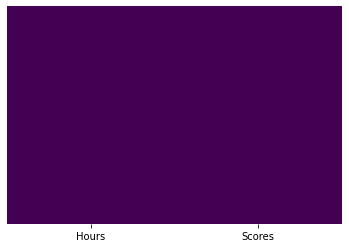

In [100]:
df.isnull().sum()
axs=sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

[Text(0.5, 0, 'Hours Studied'),
 Text(0, 0.5, 'Percentage Score'),
 Text(0.5, 1.0, 'Hours vs Percentage')]

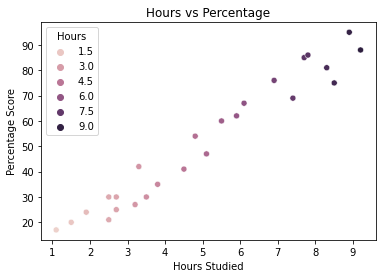

In [101]:
ax=sns.scatterplot(data=df,x='Hours',y='Scores',hue='Hours')
ax.set(xlabel='Hours Studied',ylabel='Percentage Score',title='Hours vs Percentage')

In [102]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,1].values

In [103]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [104]:
lreg=LinearRegression()
lreg.fit(X_train,Y_train)

print('Training Completed Successfully')

Training Completed Successfully


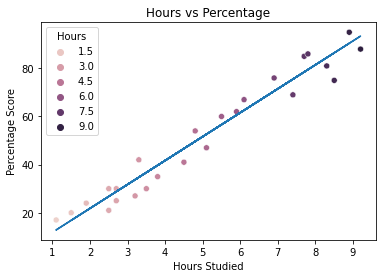

In [105]:
line=lreg.coef_*X+lreg.intercept_
ax=sns.scatterplot(data=df,x='Hours',y='Scores',hue='Hours')
ax.set(xlabel='Hours Studied',ylabel='Percentage Score',title='Hours vs Percentage')
plt.plot(X,line)

In [106]:
print(X_test)
Y_pred=lreg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [107]:
df_pred=pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
df_pred

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [108]:
print('Mean Absolute Error:',mean_absolute_error(Y_test,Y_pred))

Mean Absolute Error: 4.130879918502486


In [110]:
hours=9.25
own_pred=lreg.predict([[hours]])
print('if the student studies for {} hours per day he/she will score {} % in exams.'.format(hours,own_pred))

if the student studies for 9.25 hours per day he/she will score [93.89272889] % in exams.
